# 3.-Transformada de Fourier

Una forma alternativa de representar las propiedades de una señal eléctrica es en dominio de frecuencia. La herramienta matemática que vincula los dominios de tiempo y frecuencia es la transformada de Fourier.
Si para una señal $x(t)$, las integrales existen (como ocurre para toda señal $x(t)$ físicamente posible), se define el par de Transformada de Fourier según:

$$X(f) = \int_{-\infty}^{\infty} x(t)e^{j \omega t}dt$$  

$$y$$

$$x(t) = \int_{-\infty}^{\infty} X(f)e^{j \omega t}df$$        

$$donde$$
 
$$ \omega=2 \pi f $$


$X(f)$ es la representación de $x(t)$ en dominio de frecuencia, es el “espectro de frecuencias" o simplemente “espectro” de $x(t)$.
Simbólicamente, se indica la relación de transformación como: $x(t) \leftrightarrow X(f)$ , que debe leerse como “La transformación de $x(t)$ es $X(f)$." El par $x(t)$ y $X(f)$ es biunívoco (a un $x(t)$ corresponde un $X(f)$ y viceversa). El símbolo $\leftrightarrow$ indica transformación). $X(f)$, es normalmente una función compleja en dominio de frecuencia.

$$X(f) = ReX(f) + jImX(f) = \int_{-\infty}^{\infty} x(t).cos(\omega t)dt - j\int_{-\infty}^{\infty} x(t).sen(\omega t)dt$$

Analizando la expresión de arriba puede deducirse que, suponiendo a $x(t)$ real:

- Si $x(t)$ es una funcion par, $Im[X(f)]=0$ y $X(f)$ es real
- Si $x(t)$ es una funcion impar, $Re[X(f)]=0$ y $X(f)$ es imaginario

- $Re X(f) = Re X(-f)$, la parte real de $X(f)$ es de simetria par 
- $Im X(f) = -Im X(-f)$, la parte imaginaria de $X(f)$ es de simetria impar 

Tambien puede ponerse: $X(f)=\overset{*}{|X(f)|} e^ {\Phi (f)}$, donde: 

$$ |X(f)|=\sqrt{(ReX(f))^2 + (ImX(f))^2} $$
$$ \Phi(f)=\arctan{\frac{ImX(f)}{ReX(f)}} $$

$|X(f)|$ es una funcion par y $\Phi(f)$ (espectro de fase) funcion impar.

Notar ademas que para $x(t)$ real: 

$$ |X(f)| = X*(f)  \text(X(f)\; es \; una \; funcion \; Hermitica)$$
$$ x(0) = \text(area \; de \; X(f))$$
$$ X(0) = \text(area \; de \; x(t))$$  



 

### Ejemplo 1

a)- Generamos una señal "A" senoidal de 5 Hz, muestreada a 1 kHz:

In [127]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

from scipy.signal import square
from IPython.display import Audio
from scipy.fft import fft, fftfreq, fftshift, ifft

In [128]:
#Generación de señal

frecuencia_muestreo = 1e3  # Hz
frecuencia_senial = 5  # Hz
tiempo_senial = 2  # segundos

cantidad_muestras_totales = math.ceil(tiempo_senial * frecuencia_muestreo)
vector_muestras_temporal = np.array([*range(cantidad_muestras_totales)]) * 1/frecuencia_muestreo

senial = np.sin(2*np.pi*frecuencia_senial*vector_muestras_temporal)

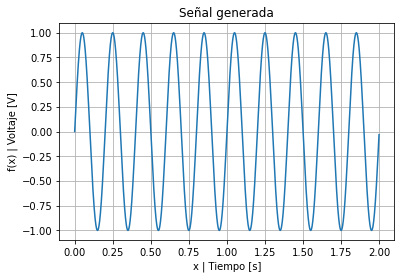

In [129]:
# Gráfico de señal

plt.title("Señal generada")

plt.plot(vector_muestras_temporal, senial)

plt.xlabel("x | Tiempo [s]")
plt.ylabel("f(x) | Voltaje [V]")

plt.grid()
plt.show()

b)- Ahora procedemos a obtener la FFT de manera que podamos obtener la señal discretizada. Visualizar espectro de amplitud y fase:

In [130]:
# Cálculo de fft
# Ref. Python: https://docs.scipy.org/doc/scipy/tutorial/fft.html#d-discrete-fourier-transforms
"""
For N even, the elements  contain the positive-frequency terms, and the elements  
contain the negative-frequency terms, in order of decreasingly negative frequency. 
For N odd, the elements  contain the positive-frequency terms, and the elements  
contain the negative-frequency terms, in order of decreasingly negative frequency.
"""

fft_senial = fft(senial)

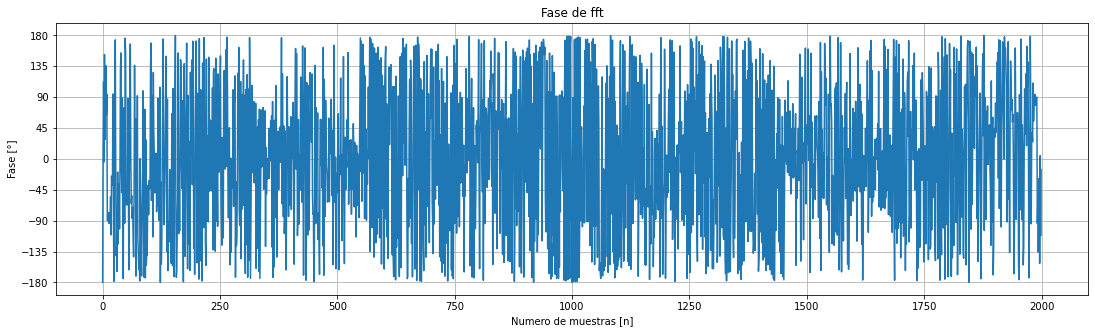

In [131]:
# Gráfica de Fase

fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title("Fase de fft")

plt.plot(range(senial.size), np.angle(fft_senial) * 180/np.pi)
plt.yticks(np.linspace(start=-180, stop=180, num=9))  # Redimensionado de eje (Fuerzo que se respeten los puntos que se indican en el array.)

plt.xlabel("Numero de muestras [n]")
plt.ylabel("Fase [°]")

plt.grid()

plt.show()

Observamos que la gráfica de fase de la fft no es la esperada a partir de la teoría que conocemos.

Esto se debe al error debido a la represetanción de punto flotante en una pc.

In [132]:
# Ver error de punto flotante

print(fft_senial[1])

(1.5389360330863235e-13+4.213897444585304e-14j)


En el caso anterior, vemos que los valores son muy pequeños, se podrían considerar cero, pero debido a los errores acarreados en los cálculos de la transforamada, y al error de representación de punto flotante, el valor almacenado en la variable no es cero.

Esto genera una interpretación errónea en la gráfica de la fase de la FFT calculada.

In [133]:
# Correción de error debido a punto flotante
tolerance = 1e-3

fft_senial_fixed = fft_senial.copy()

# Parte Real
fft_senial_fixed.real[abs(fft_senial_fixed.real) < tolerance] = 0.0

# Parte Imaginaria
fft_senial_fixed.imag[abs(fft_senial_fixed.imag) < tolerance] = 0.0

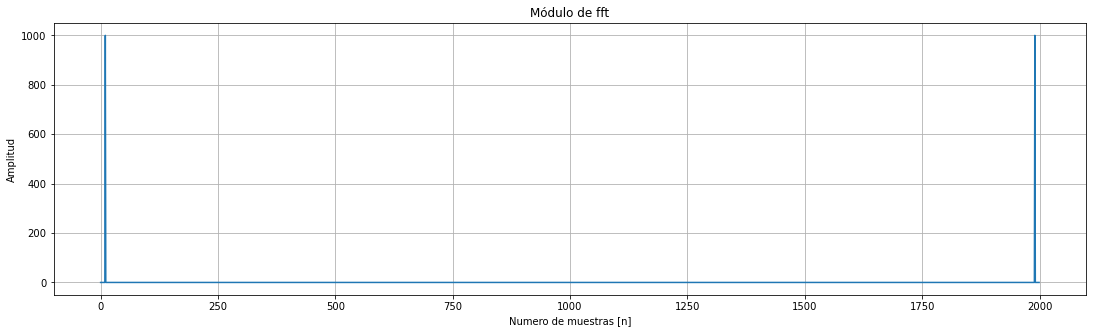

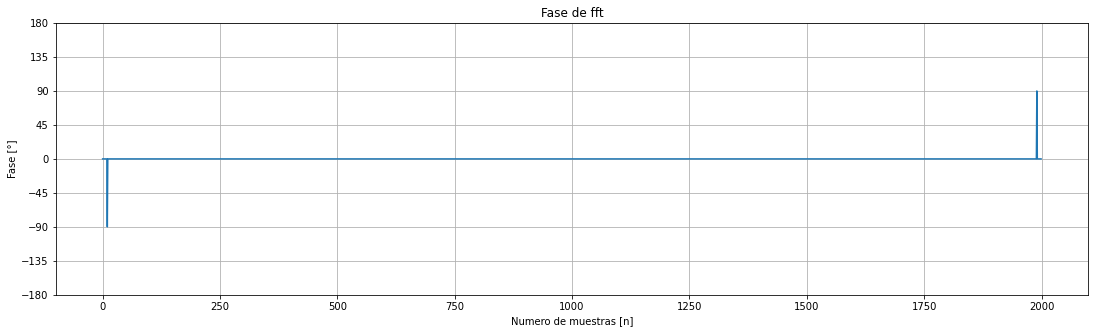

In [134]:
# Gráfica de Módulo

fig = plt.gcf()
fig.set_size_inches(18.5, 5)


plt.title("Módulo de fft")

plt.plot(range(senial.size), np.abs(fft_senial_fixed))

plt.xlabel("Numero de muestras [n]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

# Gráfica de Fase
fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title("Fase de fft")

plt.plot(range(senial.size), np.angle(fft_senial_fixed) * 180/np.pi)

plt.yticks(np.linspace(start=-180, stop=180, num=9))
plt.xlabel("Numero de muestras [n]")
plt.ylabel("Fase [°]")

plt.grid()
plt.show()

## 3.1- Teoremas Relacionados a la Transformada de Fourier 

Definidas las trasnformaciones: $x(t) \leftrightarrow X(f)$ $\land$ $y(t) \leftrightarrow Y(f)$

* Desplazamiento en Tiempo: $X(t-t_{0}) \leftrightarrow X(f)e^{-j2 \pi f t_{0}}$

* Desplazamiento en Frecuencia: $x(t)e^{-j2 \pi f_{0} t} \leftrightarrow  X(f-f_{0})$

* Diferenciacion: $\frac{dx(t)}{dt} \leftrightarrow j2 \pi f X(f)$

* Integracion: $ \int_{-\infty}^{t} x(t)dt \leftrightarrow \frac{1}{j2 \pi f}X(f) + \frac{1}{2}X(0)\delta(f)$

* Convolucion en Frecuencia: $x(t).y(t) \leftrightarrow X(f)*Y(f)$ 

* Convolucion en Tiempo: $x(t)*y(t) \leftrightarrow X(f).Y(f)$. 

    * Donde el producto de convolucion (*) esta definido por: $c(t) = x(t)*y(t) = \int_{-\infty}^{\infty} x(z).y(t-z)dz$ 


* Linealidad: $a.x(t) + b.y(t) = a.X(f)+b.Y(f)$ 

* Cambio de Escala: $x(a.t) \leftrightarrow \frac{1}{a}.X(\frac{f}{a})$

* Simetria:

    * $X(t) \leftrightarrow x(-f)$
    * $X(-t) \leftrightarrow x(f)$  

### Transformada Discreta de Fourier

La Transformada de Fourier de una determinada señal, puede calcularse a pesar de no conocerse su expresión matemática $x(t)$, si se dispone de un número adecuado de muestras de la señal a lo largo del tiempo.
Suponer una señal $x(t)$ que existe durante un lapso de T seg. y es 0 para el resto del tiempo. Si se toman N muestras de la señal a intervalos razonablemente cortos, p. ej. a $t = 0, 1\Delta t, 2\Delta t, 3\Delta t, …k\Delta t,… (N-1)\Delta t$ y se mantiene después de cada muestra el valor $x(k\Delta t)$ durante ∆t seg. puede aproximarse la integral para calcular $X(f)$ según:

$$X(f) = \int_{T}x(t).e^{j.2.\pi.f.t} \approx \sum_{k=0}^{N-1}x(k.\Delta t).e^{-j2.\pi.f.k.\Delta t}.\Delta t = X_d(f)$$


Si $\Delta t$ es suficientemente pequeno entonces $X_d(f) = X(f)$

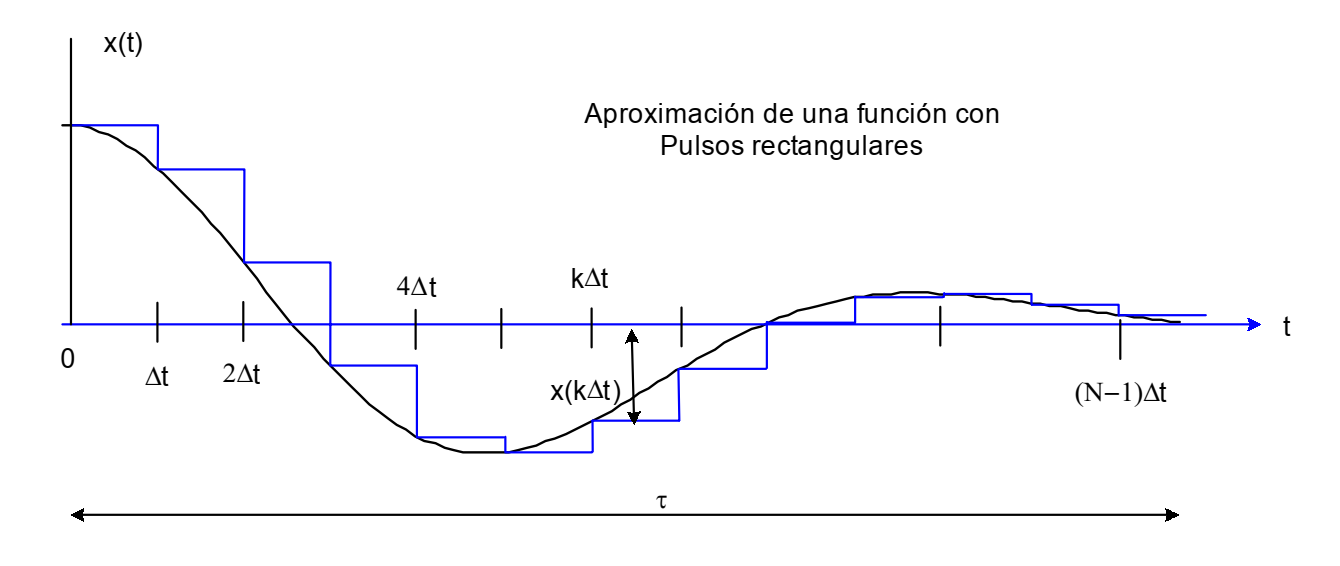

$ \Delta t = \frac{\tau}{N}$, suponiendo intervalo uniforme entre muestras. La expresion para X(f) queda: 


$$  X_d(f) = \frac{\tau}{N}.\sum_{k=0}^{N-1}x_k.e^{-j2.\pi.f.k.\frac{\tau}{N}} \:\:  donde \:\:  x_k=x(k.\Delta t)$$

Llamando  $f_{0} = \frac{1}{\tau}$  nos queda: 

$$ X_d(f) = \frac{1}{N.f_{0}}.\sum_{k=0}^{N-1}x_k.e^{-j \frac{2.\pi}{N}.\frac{f}{f_{0}}.k}$$

* El **espectro de la Transformada Discreta $X_d(f) es continuo**, y analizando la ecuacion anterior, podemos ver que: 

$$  X_d(f+N.f_{0}) = \frac{1}{N.f_{0}}.\sum_{k=0}^{N-1}x_k.e^{-j \frac{2.\pi}{N}.\frac{f+N.f_{0}}{f_{0}}.k} =   \frac{1}{N.f_{0}}.\sum_{k=0}^{N-1}x_k.e^{-j \frac{2.\pi}{N}.\frac{f}{f_{0}}.k} = X_d(f) $$

como *k* es siempre un numero entero, el termino $e^{-j.2.\pi.k}$ es igual a 1 por lo que resulta que $X_d(f)$ es periodica en f y su periodo vale $Nf_0$: $N.f_{0}=\frac{N}{\tau}=\frac{1}{\Delta t} = f_{s}$ **donde $f_{s}$ es la frecuencia a que se toman las muestras de $x(t)$ (Frecuencia de Muestreo)** 

* El espectro de $X_d(f)$ es el de $X(f)$ repetido a multiplos de $f_s$ (**aliasing**). Es evidente que una mala eleccion de $f_s$ puede introducir errores en el calculo por efecto del traslapamiento de espectros

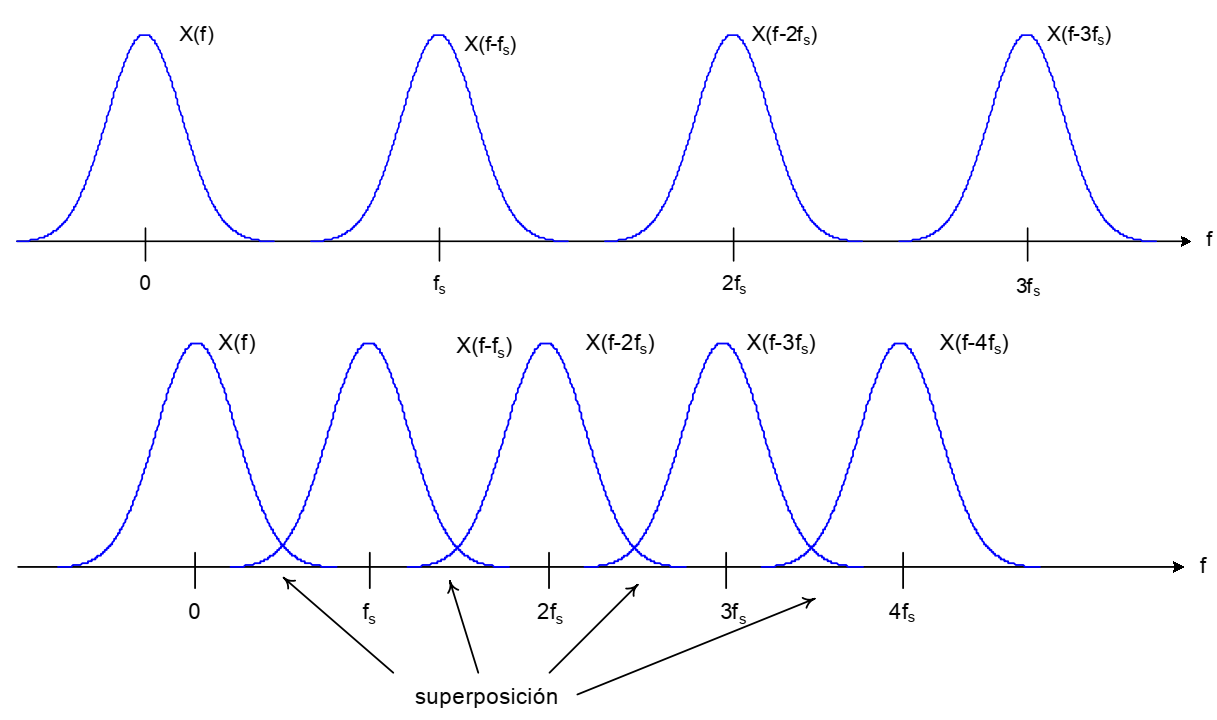

A los efectos del cálculo de la DFT, se debe utilizar la frecuencia de muestreo mas alta posible, como guía aproximada, debe ser mayor que 5...20 veces del ancho de banda (significativo) esperable de $x(t)$. En el límite, cuando $\Delta t \rightarrow 0$ y $f_s \rightarrow \infty$ , se tendrá la solución exacta $X_d(f) = X(f)$

Existen algoritmos de cálculo que aceleran el procesamiento de la suma (FFT, Fast Fourier Transform), y normalmente, calculan $X_d(f)$ en múltiplos de $f_0$ :

$$ X_d(nf_0) = \frac{1}{N.f_0} . \sum_{k=0}^{N-1}x_k.e^{-j\frac{2.\pi}{N}.n.k} = X_n$$

resultando un espectro discreto con puntos (líneas) en múltiplos de $f_0$ (En la terminología de la DFT o FFT, $f_0$ determina la resolución del espectro o el espacio entre líneas). Si la señal analizada fuera periódica, la toma de muestra debería hacerse durante un período $(T=\tau)$ y los coeficientes de la serie de Fourier resultante serían:

$$ c_n = \frac{1}{T}.X_d(nf_0)= \frac{1}{N} . \sum_{k=0}^{N-1}x_k.e^{-j\frac{2.\pi}{N}.n.k} 

La variable $f$ no aparece explícitamente en las funciones de $X_n$ o $c_n$ sino que está implícita en el orden $n$ de la
armónica de $f_0$.

Los paquetes de software que realizan la FFT, tienen las siguientes características:
* (a) el número de muestras es una potencia de 2 ($N=256,1024, 65536, etc.$)
* (b) La resolución del espectro es $\frac{1}{\tau}$ y la máxima armónica calculada es $n_max=\frac{N}{2}$, lo que da un ancho de espectro $F_{max} = \frac{N.f0}{2} = \frac{fs}{2}$.

### Ejemplo 2 

Suponga dos señales "pulso rectangular" periódicas, con un ciclo activo de 1/4; la primera centrada en el origen y la segunda con el flanco ascendente en t=0. (Es decir, con un retardo de tau/2 con respecto a la primera)
* Encuentre el espectro teórico de cada una de estas señales periódicas. Para calcular el espectro de la segunda señal, recuerde la propiedad de desplazamiento en el tiempo.
* Explique cómo difieren los espectros de fase entre las dos señales.
* Encuentre las DTF de las dos señales (partes real e imaginaria y también módulo y fase). Comente las diferencias entre el espectro de fase teórico y el obtenido numéricamente con la FFT.

In [135]:
from scipy.signal import square
from scipy.ndimage.interpolation import shift

In [136]:
# Definición variables de interés

period = 1
sample_frequency = 1e3
total_samples = int(period * sample_frequency)

duty_cicle = 0.25

vector_muestras_temporal = np.array([*range(total_samples)]) * 1/sample_frequency

In [137]:
# Generación de señal

# Pulso rectangular centrado en cero

# Generación de señal cuadrada
signal_1 = square((2*np.pi*1/period)*vector_muestras_temporal, duty=duty_cicle)  

# Llevo parte negativa de señal cuadrada a cero (correspondiente a un pulso rect.)
signal_1[signal_1 < 0] = 0

# Desplazo señal para centrarla en cero
signal_1 = shift(signal_1, signal_1.size*(1-duty_cicle)/2, cval=0)

# Centro vector con muestras temporal en cero
vector_muestras_temporal_1 = vector_muestras_temporal - max(vector_muestras_temporal)/2

# Pulso rectangular con flanco ascendente en cero

# Generación de señal cuadrada
signal_2 = square(2*np.pi*1/period*vector_muestras_temporal, duty=duty_cicle)

# Llevo parte negativa de señal cuadrada a cero (correspondiente a un pulso rect.)
signal_2[signal_2 < 0] = 0

# No modifico eje temporal ya que no la desplacé a la señal
vector_muestras_temporal_2 = vector_muestras_temporal.copy()

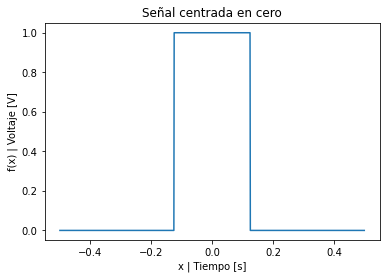

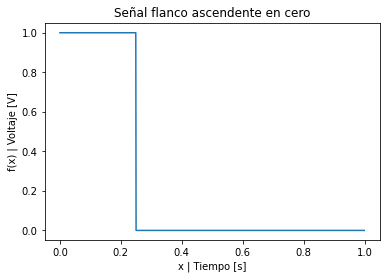

In [138]:
# Gráfica señal centrada en cero
plt.title("Señal centrada en cero")

plt.plot(vector_muestras_temporal_1, signal_1)

plt.xlabel("x | Tiempo [s]")
plt.ylabel("f(x) | Voltaje [V]")

plt.show()

# Gráfica señal con flanco ascendente en cero
plt.title("Señal flanco ascendente en cero")

plt.plot(vector_muestras_temporal_2, signal_2)

plt.xlabel("x | Tiempo [s]")
plt.ylabel("f(x) | Voltaje [V]")

plt.show()

a) Encuentre el espectro teórico de cada una de estas señales periódicas. Para calcular el espectro de la segunda señal, recuerde la propiedad de desplazamiento en el tiempo.

$X(e^{jw}) = \sum_{n=-∞}^{∞}{x[n] e^{-jwn}}$

* Obtención teórica, pulso centrado en cero:

$X(e^{jw}) = \int_{-\tau/2}^{\tau/2}{A e^{-jwn}}$ 

$X(e^{jw}) = - \frac{A}{jw} e^{-jw\tau/2}$

$X(e^{jw}) = \frac{2A}{w} (\frac{e^{jw\tau/2} - e^{-jw\tau/2}}{j2})$

$X(e^{jw}) = A\tau [\frac{sin(w\tau/2)}{w\tau/2}]$

$X(e^{jw}) = A\tau sinc(w\frac{\tau}{2})$

Obtención teórica, pulso flanco ascendente en origen:

  * Propiedad desplazamiento en el tiempo:

    Si,  $ x(t) ⟷ X(e^{jw}) $

    Entonces, $ x(t - to) ⟷ e^{-jwt_{0}}X(e^{jw}) $ 

Por lo tanto,

  Si,  
  
   $ x(t) ⟷ X(e^{jw}) = A\tau sinc(w\frac{\tau}{2}) $

  Entonces, 
  
   $ x(t + \tau/2) ⟷ e^{jw\frac{\tau}{2}}A\tau sinc(w\frac{\tau}{2}) $ 

c) Encuentre las DTF de las dos señales (partes real e imaginaria y también módulo y fase). Comente las diferencias entre el espectro de fase teórico y el obtenido numéricamente con la FFT.

In [139]:
# Cálculo de FFT
fft_signal_1 = fft(signal_1)
fft_signal_2 = fft(signal_2)

# Corrección error por punto flotante
tolerance = 1e-3

fft_senial_fixed_1 = fft_signal_1.copy()

# Parte Real
fft_senial_fixed_1.real[abs(fft_senial_fixed_1.real) < tolerance] = 0.0
# Parte Imaginaria
fft_senial_fixed_1.imag[abs(fft_senial_fixed_1.imag) < tolerance] = 0.0

fft_senial_fixed_2 = fft_signal_2.copy()

# Parte Real
fft_senial_fixed_2.real[abs(fft_senial_fixed_2.real) < tolerance] = 0.0
# Parte Imaginaria
fft_senial_fixed_2.imag[abs(fft_senial_fixed_2.imag) < tolerance] = 0.0

# Obtención de frecuencia en eje x
fft_freq = fftfreq(fft_senial_fixed_1.size, 1/sample_frequency)

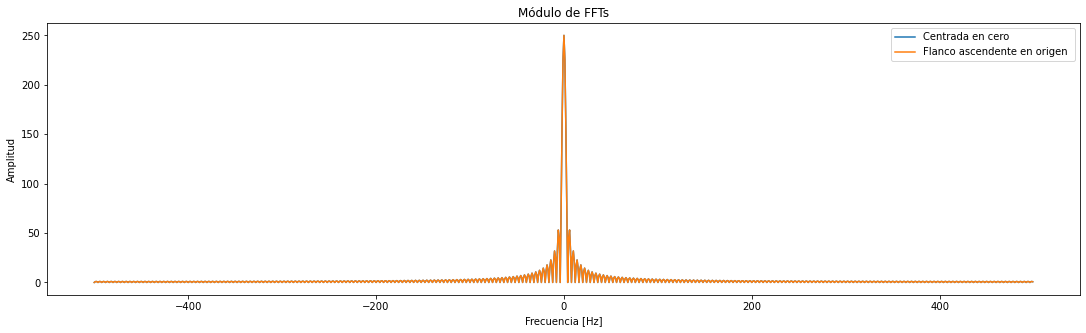

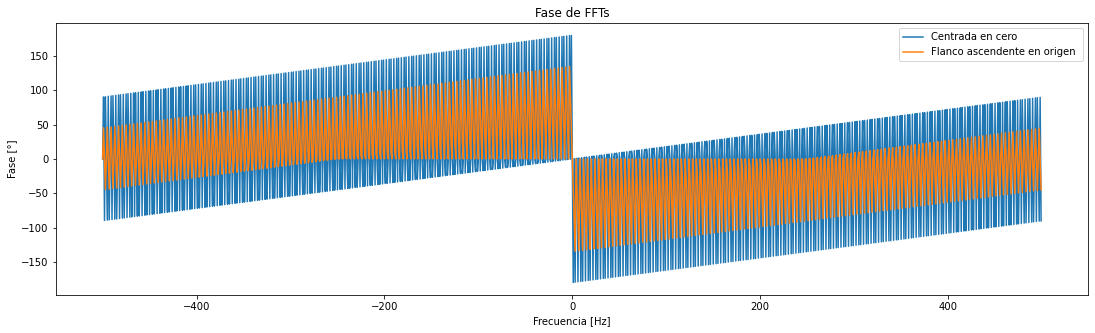

In [140]:
# Gráficas
# Gráfica de Módulo
fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title("Módulo de FFTs")

plt.plot(fftshift(fft_freq), fftshift(np.abs(fft_senial_fixed_1)))
plt.plot(fftshift(fft_freq), fftshift(np.abs(fft_senial_fixed_2)))

plt.legend(["Centrada en cero", "Flanco ascendente en origen "])
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.show()

# Gráfica de Fase
fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title("Fase de FFTs")

plt.plot(fftshift(fft_freq), fftshift(np.angle(fft_senial_fixed_1) * 180/np.pi))
plt.plot(fftshift(fft_freq), fftshift(np.angle(fft_senial_fixed_2) * 180/np.pi))

plt.legend(["Centrada en cero", "Flanco ascendente en origen "])
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Fase [°]")

plt.show()

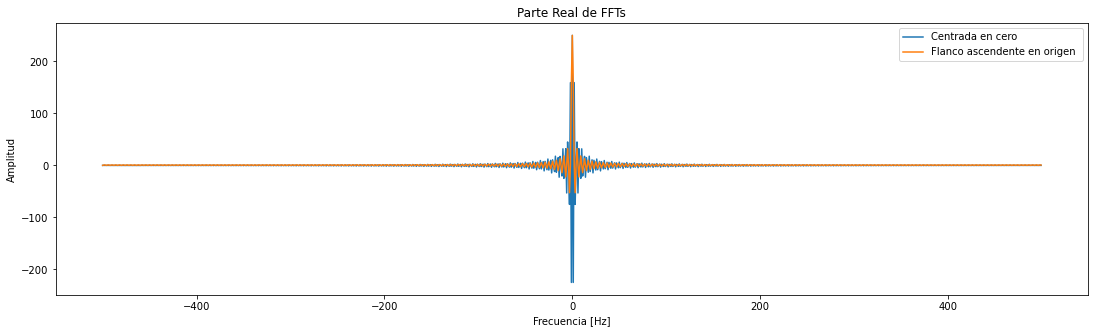

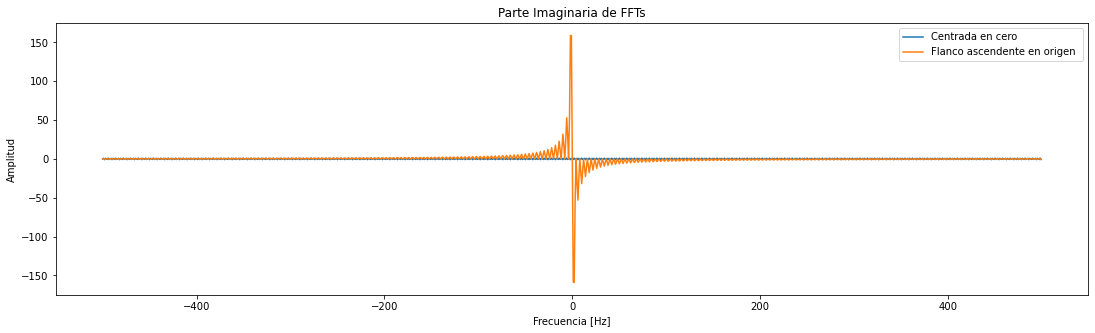

In [141]:
# Gráficas
# Gráfica de Parte Real
fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title("Parte Real de FFTs")

plt.plot(fftshift(fft_freq), fftshift(fft_senial_fixed_1.real))
plt.plot(fftshift(fft_freq), fftshift(fft_senial_fixed_2.real))

plt.legend(["Centrada en cero", "Flanco ascendente en origen "])
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.show()

# Gráfica de Parte Imaginaria
fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title("Parte Imaginaria de FFTs")

plt.plot(fftshift(fft_freq), fftshift(fft_senial_fixed_1.imag))
plt.plot(fftshift(fft_freq), fftshift(fft_senial_fixed_2.imag))

plt.legend(["Centrada en cero", "Flanco ascendente en origen "])
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.show()

### Ejemplo 3 

Use el archivo .ipynb compartido  para visualizar el producto de convolución de un pulso rectangular y una señal con forma de "aleta de tiburón".
* a) Verifique la conmutatividad del proceso de convolución.
* b) Verifique que la operatoria para señales no-causales y para las causales es la misma.
* c) Pruebe con otras señales también. Para construir las señales a convolucionar puede usar el
método compartido  llamado obtener_funcion_deseada().


In [142]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.ndimage.interpolation import shift
from scipy.fft import ifft, fft
from scipy.signal import freqs, iirfilter, square

from typing import Union, List, Tuple
from IPython.display import Audio

##### Funciones Auxiliares

In [143]:
def obtener_pulso_rectangular(periodo: Union[float, int], vector_temporal: np.ndarray, ciclo_de_trabajo: float, es_centrado: bool = False) -> np.ndarray:
  """Obtener un pulso rectangular

  Parameters
  ----------
  periodo: Union[float, int]
    Periodo del pulso rectangular
  vector_temporal: np.ndarray
    Eje temporal del pulso rectangular
  ciclo_de_trabajo: float
    Ciclo de trabajo esperado 
  es_centrado: Optional[bool] = False
    Indica si el pulso rectangular está centrado o no en el origen

  Returns
  -------
  np.ndarray
    Pulso rectangular deseado
  """
  voltaje_inferior = 0
  
  senial = square((2*np.pi*1/periodo)*vector_temporal, duty=ciclo_de_trabajo)
  senial[senial < 0] = voltaje_inferior

  if es_centrado:
    senial = shift(senial, senial.size*(1-ciclo_de_trabajo)/2, cval=voltaje_inferior)

  return senial

In [144]:
def obtener_funcion_deseada(pares_ordenados: List[Tuple[int, int]], cantidad_puntos_por_ciclo: int) -> Tuple[np.ndarray, np.ndarray, int]:
    """Obtener una función deseada a partes de un conjunto de pares ordenados

    Parameters
    ----------
    pares_ordenados : List[Tuple[int, int]]
        Pares ordenados que se desean satisfacer en la función deseada
    cantidad_puntos_por_ciclo : int
        Cantidad de muestras totales que se desea de la función

    Returns
    -------
    Tuple[np.ndarray, np.ndarray]
        Tupla con primer elemento con valores del eje de abscisa y segundo elemento con valores del eje de ordenadas 
    """
    x_max = np.max([x for x, y in pares_ordenados])
    x_min = np.min([x for x, y in pares_ordenados])

    vector_y = [y for x, y in pares_ordenados]

    senial_en_x = np.linspace(start=x_min, stop=x_max, num=cantidad_puntos_por_ciclo)

    senial_en_y = []

    for index in range(len(pares_ordenados)):
      if index == 0:
        senial_en_y.append(pares_ordenados[index][1])
      elif index == len(pares_ordenados) - 1:
        continue

      pendiente = (pares_ordenados[index + 1][1] - pares_ordenados[index][1]) / (pares_ordenados[index + 1][0] - pares_ordenados[index][0]) 

      for muestra_temporal in senial_en_x:
        if pares_ordenados[index][0] <= muestra_temporal and muestra_temporal < pares_ordenados[index + 1][0]:
          senial_en_y.append(senial_en_y[-1] + pendiente * (x_max - x_min)/vector_muestras_temporal.size)  
        
    return np.array(senial_en_y)

a)- Visualizar el producto de convolución de un pulso rectangular y una señal con forma de "aleta de tiburón".

In [145]:
# Definición de variables

periodo = 2  # segundos
frecuencia_muestreo = 1e3
total_samples = int(periodo * frecuencia_muestreo)

In [146]:
# Generación de vector con muestras temporales

vector_muestras_temporal = np.array([*range(total_samples)]) * 1/frecuencia_muestreo

In [147]:
# Generación de Puslo rectangular

pulso_rectangular = obtener_pulso_rectangular(  # Usar la función dada como Función Auxiliar
    periodo=periodo,
    vector_temporal=vector_muestras_temporal,
    ciclo_de_trabajo=0.5,
    es_centrado=False
)

In [148]:
# Generación de Aleta de Tiburón

pares_ordenados = [
  (0, 0),
  (5, 1),
  (5.0001, 0)
]

aleta_tiburon = obtener_funcion_deseada(
    pares_ordenados=pares_ordenados,
    cantidad_puntos_por_ciclo=vector_muestras_temporal.size
)

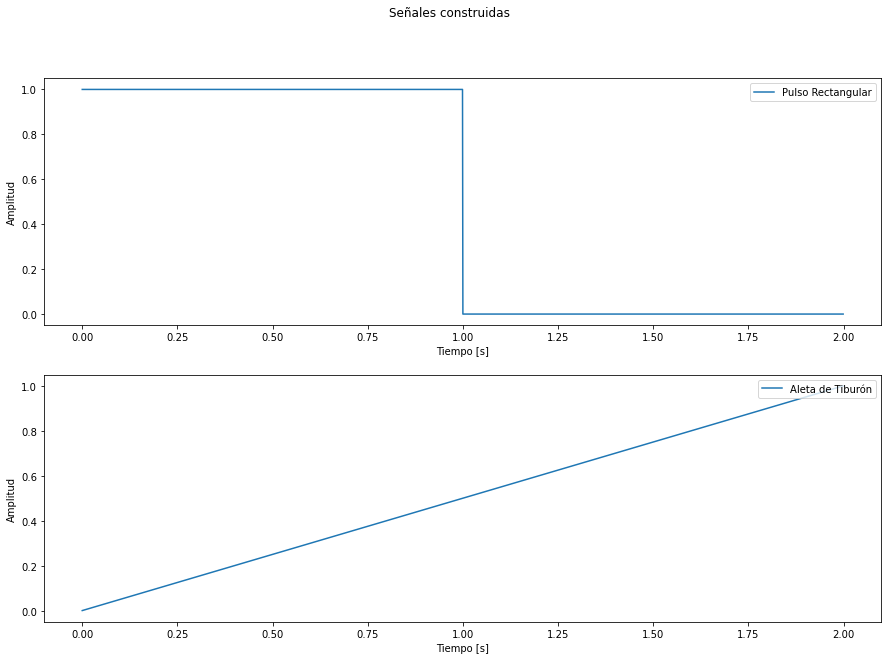

In [149]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(15, 10)

fig.suptitle("Señales construidas")

ax1.plot(vector_muestras_temporal, pulso_rectangular, label="Pulso Rectangular")
ax1.legend(loc="upper right")
ax1.set_ylabel("Amplitud")
ax1.set_xlabel("Tiempo [s]")

ax2.plot(vector_muestras_temporal, aleta_tiburon, label="Aleta de Tiburón")
ax2.legend(loc="upper right")
ax2.set_ylabel("Amplitud")
ax2.set_xlabel("Tiempo [s]")

plt.show()

In [150]:
def obtener_convolucion(senial_1: np.ndarray, senial_2: np.ndarray, vector_temporal_senial_1: np.ndarray, vector_temporal_senial_2: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
  """
  Obtengo la convolución entre dos señales

  Parameters
  ----------
  senial_1: np.ndarray
    Señal 1 a convolucionar
  senial_2: np.ndarray
    Señal 2 a convolucionar
  vector_temporal_senial_1: np.ndarray
    Vector con muestras temporales de señal 1
  vector_temporal_senial_2: np.ndarray
    Vector con muestras temporales de señal 2

  Returns
  -------
  Tuple[np.ndarray, np.ndarray]
    Eje temporal de convolución y resultado de convolución de señales.
  """
  senial_2_invertida = np.flip(senial_2)  # senial[::-1]

  # np.pad(): https://numpy.org/doc/stable/reference/generated/numpy.pad.html
  senial_1_completa = np.pad(senial_1, (senial_2.size, 0), 'constant')
  senial_2_completa = np.pad(senial_2_invertida, (0, senial_1.size), 'constant')

  convolucion_vector = []
  for shift_amount in range(senial_1_completa.size):  # [0, 1,..., N + M - 1]
    senial_2_shift = shift(senial_2_completa, shift=shift_amount, cval=0)
    valor_producto_punto = np.dot(senial_1_completa, senial_2_shift)
    convolucion_vector.append(valor_producto_punto)

  # Para señales causales
  eje_temporal = np.linspace(
      start=0,
      stop=np.max(vector_temporal_senial_1) + np.max(vector_temporal_senial_2),
      num=len(convolucion_vector)
  )
  return eje_temporal, np.array(convolucion_vector)

In [151]:
# Uso de función para obtener convolución

eje_temporal, convolucion_resultado = obtener_convolucion(
    senial_1=pulso_rectangular,
    senial_2=aleta_tiburon,
    vector_temporal_senial_1=vector_muestras_temporal,
    vector_temporal_senial_2=vector_muestras_temporal
)

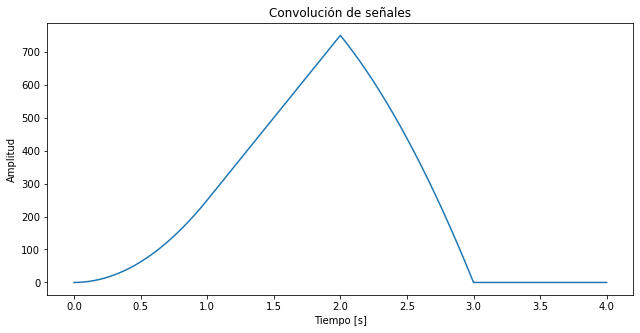

In [152]:
# Grafica de la convolución

fig = plt.gcf()
fig.set_size_inches(10.5, 5)

plt.title("Convolución de señales")
plt.plot(eje_temporal, convolucion_resultado)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.show()

## Ejemplo 4 

Se tiene una señal de energía, de 1 segundo de duración, consistente en 6 ciclos cosenoidales centrados en el origen.
* a) Considere a la señal dada como formada por el producto (en el tiempo) de la señal cosenoidal de duración infinita multiplicada por un pulso rectangular de amplitud
unitaria. Encuentre la TdF aplicando la propiedad de "producto en el tiempo - convolución en la frecuencia" la TdF.
* b) ¿Cómo sería el espectro (TdF) de una señal periódica formada por el pulso del ítem anterior repetida cada 20 segundos?
* c) Haga una estimación de los espectros utilizando la FFT y compare con los teóricos.
* d) Calcule la energía de la señal "a" y la potencia de la señal "b"; primero las teóricas, luego numéricamente a partir de las formas de onda discretizadas y finalmente a partir de los espectros calculados con la FFT.
* e) ¿Cómo cambian los espectros si se tienen 6 ciclos senoidales en lugar de los cosenoidales?

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift

from typing import Union
from scipy.signal import square, fftconvolve
from scipy.ndimage.interpolation import shift

In [154]:
# Generamos la señal seno

frecuencia_senial = 1000  # Hz
cantidad_ciclos = 6

frecuencia_muestreo = frecuencia_senial * 100
duracion_senial = 1/frecuencia_senial * cantidad_ciclos

vector_tiempo = np.arange(
    start=0,
    stop=duracion_senial,
    step=1/frecuencia_muestreo
)

senial = np.cos(2*np.pi*frecuencia_senial*vector_tiempo)

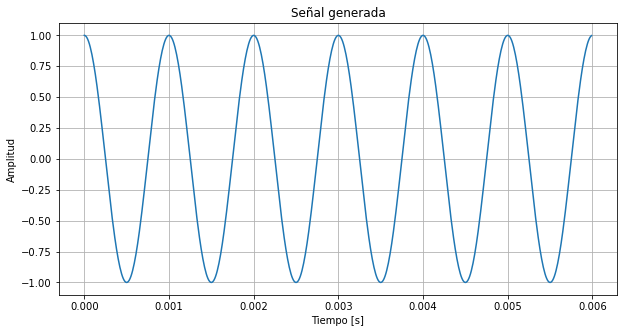

In [155]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Señal generada")

plt.plot(vector_tiempo, senial)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

In [156]:
# La centramos en el origen

cantidad_segundos_lados = duracion_senial / 2 

cantidad_muestras_lados = int(frecuencia_muestreo * cantidad_segundos_lados)

senial_centrada = np.pad(
    senial,
    (cantidad_muestras_lados, cantidad_muestras_lados-1)
)

vector_tiempo_centrado = np.arange(
    start=-cantidad_segundos_lados-vector_tiempo.max()/2,
    stop=cantidad_segundos_lados+vector_tiempo.max()/2,
    step=1/frecuencia_muestreo
)

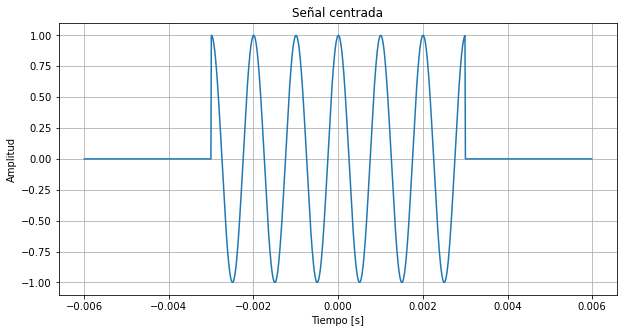

In [157]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Señal centrada")

plt.plot(vector_tiempo_centrado, senial_centrada)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

a)- Considere a la señal dada como formada por el producto (en el tiempo) de la señal cosenoidal de duración infinita multiplicada por un pulso rectangular de amplitud unitaria.

Encuentre la TdF aplicando la propiedad de "producto en el tiempo - convolución en la frecuencia" la TdF

In [158]:
# Creo un pulso rectangular centrado

pulso_rectangular = square((2*np.pi*duracion_senial)*vector_tiempo, duty=0.5)
pulso_rectangular_centrado = np.pad(
    pulso_rectangular,
    (cantidad_muestras_lados, cantidad_muestras_lados-1)
)

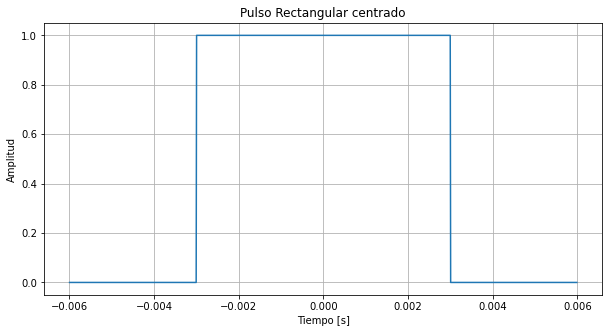

In [159]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Pulso Rectangular centrado")

plt.plot(vector_tiempo_centrado, pulso_rectangular_centrado)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

In [160]:
# Creo señal coseno infinita
senial_infinita = np.cos(2*np.pi*frecuencia_senial*vector_tiempo_centrado)

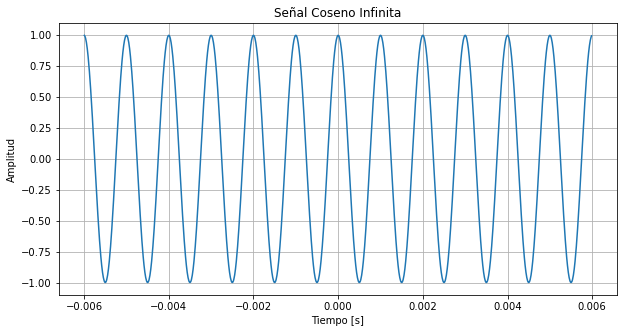

In [161]:
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Señal Coseno Infinita")

plt.plot(vector_tiempo_centrado, senial_infinita)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

#### Producto Temporal

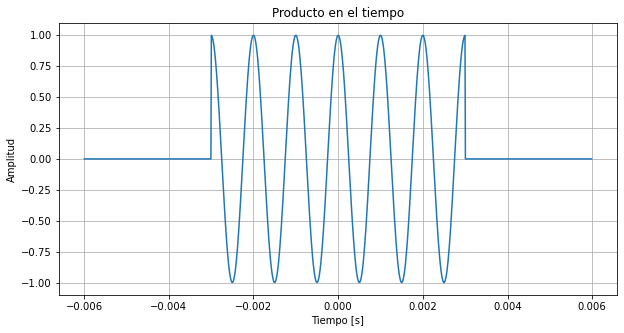

In [162]:
producto_temporal = pulso_rectangular_centrado * senial_infinita

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Producto en el tiempo")

plt.plot(vector_tiempo_centrado, producto_temporal)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

#### Convolucion en Frecuencia

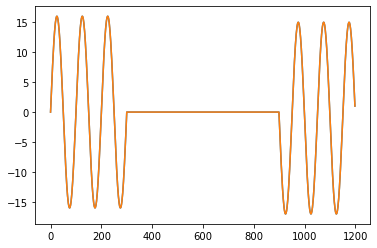

In [163]:
plt.plot(fftconvolve(senial_infinita,pulso_rectangular,mode="same"))
plt.plot(np.convolve(senial_infinita,pulso_rectangular,mode="same"))

In [164]:
vector_tiempo_centrado

array([-0.005995, -0.005985, -0.005975, ...,  0.005965,  0.005975,
        0.005985])

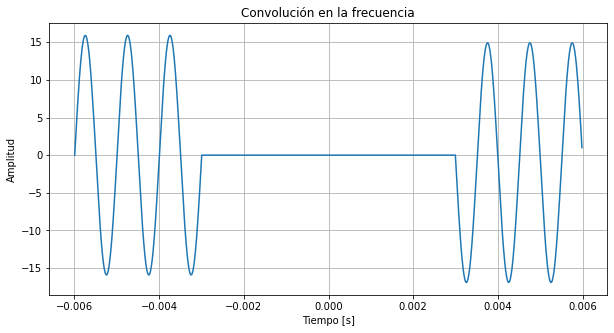

In [165]:
convolucion_frecuencia = fftconvolve(senial_infinita, pulso_rectangular_centrado, mode='same')

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title("Convolución en la frecuencia")

plt.plot(vector_tiempo_centrado, convolucion_frecuencia)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

### Ejemplo 5 

* a) Suponga que se tiene una señal senoidal de 5Hz, alrededor de 200 ciclos; dibuje 3 ciclos en su pc.
* b) Suponga que esa señal se muestrea a una frecuencia de 7,3Hz. Dibuje los puntos muestreados superpuestos al gráfico de la señal original.
* c) Usando la DFT dibuje los espectros de la señal original y de la señal submuestreada, empleando los puntos de muestra que se poseen. Notando el efecto de aliasing. ¿Cuál es la frecuencia de la señal "alias"?
* d) Graficar sobre la señal original la señal de "alias"


a) Suponga que se tiene una señal senoidal de 5Hz, alrededor de 200 ciclos; dibuje 3 ciclos en su pc.

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fft import fft, fftfreq, fftshift, ifft

In [167]:
# Creamos una señal sinusoidal de 5 Hz con 200 ciclos

frecuencia_senial = 5  # Hz
cantidad_ciclos_senial = 200  # Hz

frecuencia_muestreo = frecuencia_senial * 20

cantidad_muestras_un_ciclo = 1/frecuencia_senial * frecuencia_muestreo

vector_tiempo = np.arange(
    start=0,
    stop=cantidad_ciclos_senial*1/frecuencia_senial,
    step=1/frecuencia_muestreo
)

senial = np.sin(2*np.pi*frecuencia_senial * vector_tiempo)

In [168]:
# Defino cantidad de ciclos a graficar

ciclos_a_graficar = 3 
cantidad_muestras_tres_ciclos = math.ceil(cantidad_muestras_un_ciclo * ciclos_a_graficar)

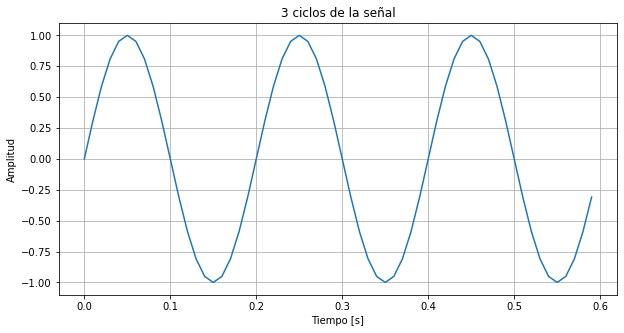

In [169]:
# Grafico los primero 3 ciclos de la señal

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"{ciclos_a_graficar} ciclos de la señal")

plt.plot(
    vector_tiempo[:cantidad_muestras_tres_ciclos],
    senial[:cantidad_muestras_tres_ciclos]
)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

b) Suponga que esa señal se muestrea a una frecuencia de 7,3Hz. Dibuje los puntos muestreados superpuestos al gráfico de la señal original.

In [170]:
# Cambiamos la frecuencia de muestreo original por la que dice el enunciado

frecuencia_muestreo_b = 7.3  # Hz

cantidad_muestras_un_ciclo_b = 1/frecuencia_senial * frecuencia_muestreo_b

vector_tiempo_b = np.arange(
    start=vector_tiempo[0],
    stop=vector_tiempo[-1],
    step=1/frecuencia_muestreo_b
)

senial_b = np.sin(2*np.pi*frecuencia_senial * vector_tiempo_b)

cantidad_muestras_tres_ciclos_b = math.ceil(cantidad_muestras_un_ciclo_b * ciclos_a_graficar)

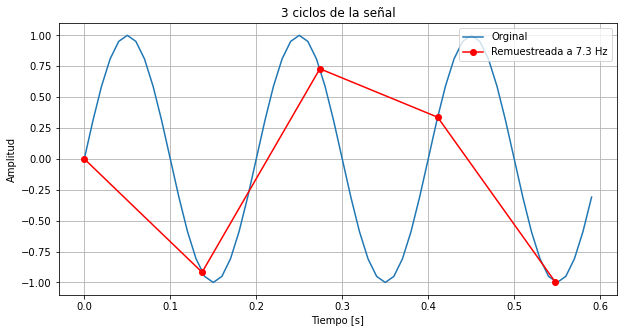

In [171]:
# Grafico los primero 3 ciclos de la señal original y la señal remuestreada

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"{ciclos_a_graficar} ciclos de la señal")

plt.plot(
    vector_tiempo[:cantidad_muestras_tres_ciclos],
    senial[:cantidad_muestras_tres_ciclos],
    '-',
    vector_tiempo_b[:cantidad_muestras_tres_ciclos_b],
    senial_b[:cantidad_muestras_tres_ciclos_b],
    'ro-'
)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(['Orginal', f'Remuestreada a {frecuencia_muestreo_b} Hz'], loc='upper right')

plt.grid()
plt.show()

c) Usando la DFT dibuje los espectros de la señal original y de la señal submuestreada, empleando los puntos de muestra que se poseen. Notando el efecto de aliasing. ¿Cuál es la frecuencia de la señal "alias"?

In [172]:
senial_fft = fft(senial)
senial_b_fft = fft(senial_b)

senial_freqs = fftfreq(senial.shape[0], 1/frecuencia_muestreo)
senial_b_freqs = fftfreq(senial_b.shape[0], 1/frecuencia_muestreo_b)

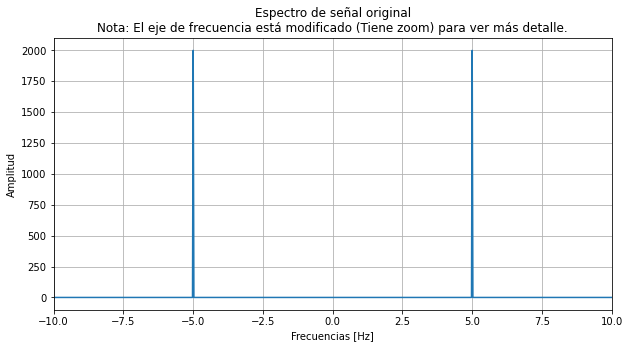

In [173]:
# Grafico el espectro de la señal original

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"Espectro de señal original\nNota: El eje de frecuencia está modificado (Tiene zoom) para ver más detalle.")

plt.plot(fftshift(senial_freqs), fftshift(np.abs(senial_fft)))

plt.xlabel("Frecuencias [Hz]")
plt.ylabel("Amplitud")

plt.xlim(-2*frecuencia_senial, 2*frecuencia_senial)

plt.grid()
plt.show()

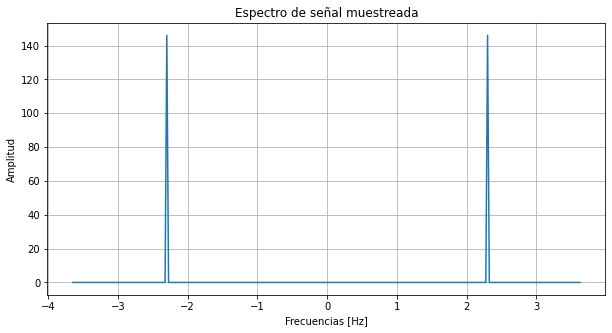

In [174]:
# Grafico el espectro de la señal remuestreada

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"Espectro de señal muestreada")

plt.plot(fftshift(senial_b_freqs), fftshift(np.abs(senial_b_fft)))

plt.xlabel("Frecuencias [Hz]")
plt.ylabel("Amplitud")

plt.grid()
plt.show()

Se puede observar que la frecuencia de la señal de alias es de aproximadamente 2.3 [Hz]

d) Graficar sobre la señal original la señal de "alias"

In [175]:
senial_d = ifft(senial_b_fft).real

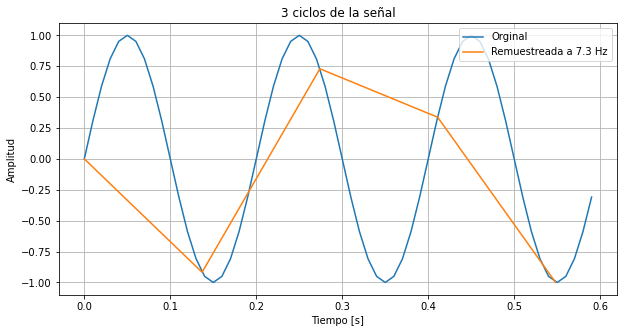

In [176]:
# Grafico los primero 3 ciclos de la señal original y la señal remuestreada

fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title(f"{ciclos_a_graficar} ciclos de la señal")

plt.plot(
    vector_tiempo[:cantidad_muestras_tres_ciclos],
    senial[:cantidad_muestras_tres_ciclos],
    '-',
    vector_tiempo_b[:cantidad_muestras_tres_ciclos_b],
    senial_d[:cantidad_muestras_tres_ciclos_b],
    '-'
)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend(['Orginal', f'Remuestreada a {frecuencia_muestreo_b} Hz'], loc='upper right')

plt.grid()
plt.show()

Se puede observar en el gráfico que la señal tarda aproximadamente 0.45 segundos en comenzar un nuevo periodo. Esto es equivalente a una frecuencia de 2.22 [Hz]

### Ejemplo 6 

Si de una señal temporal se toma una muestra discreta de N puntos, y luego se busca  su espectro de frecuencias mediante la FFT ocurre que, según la cantidad de muestras utilizadas, el espectro obtenido resulta diferente. 

Observe el mencionado efecto considerando una señal periódica cuadrada, adoptando N1=100 y N2=200. (Basta comparar desde CD hasta la armónica 11 o 12).

In [177]:
# Generación de señales con diferente muestreo

N1 = 100
N2 = 200

periodo = 2  # segundos

vector_muestras_temporal_1 = np.linspace(start=0, stop=periodo, num=N1)
vector_muestras_temporal_2 = np.linspace(start=0, stop=periodo, num=N2)

signal_1 = square(2*np.pi*1/periodo*vector_muestras_temporal_1)
signal_2 = square(2*np.pi*1/periodo*vector_muestras_temporal_2)

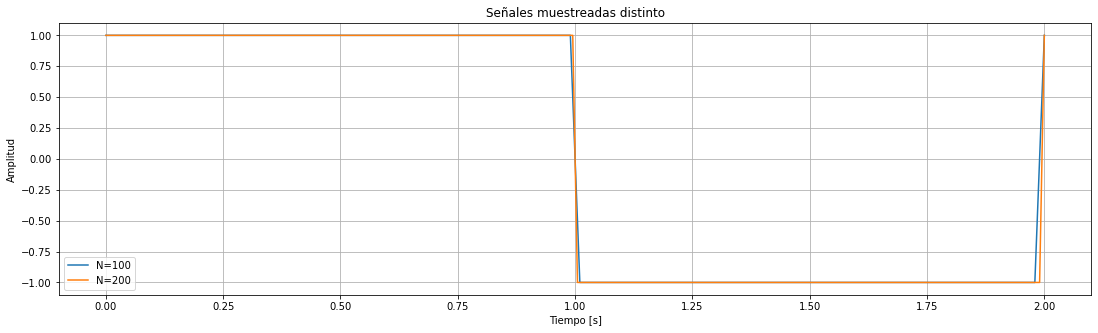

In [178]:
# Gráfica: Señales con diferentes muestreos.

fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title("Señales muestreadas distinto")

plt.plot(vector_muestras_temporal_1, signal_1)
plt.plot(vector_muestras_temporal_2, signal_2)

plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend([f"N={N1}", f"N={N2}"])

plt.grid()
plt.show()

In [179]:
# Cálculo FFT de ambas señales

fft_signal_1 = fft(signal_1)
fft_signal_2 = fft(signal_2)

In [180]:
# Arreglo de error de punto flotante en FFT

tolerance = 1e-3

fft_senial_fixed_1 = fft_signal_1.copy()
fft_senial_fixed_1.real[abs(fft_senial_fixed_1.real) < tolerance] = 0.0
fft_senial_fixed_1.imag[abs(fft_senial_fixed_1.imag) < tolerance] = 0.0

fft_senial_fixed_2 = fft_signal_2.copy()
fft_senial_fixed_2.real[abs(fft_senial_fixed_2.real) < tolerance] = 0.0
fft_senial_fixed_2.imag[abs(fft_senial_fixed_2.imag) < tolerance] = 0.0

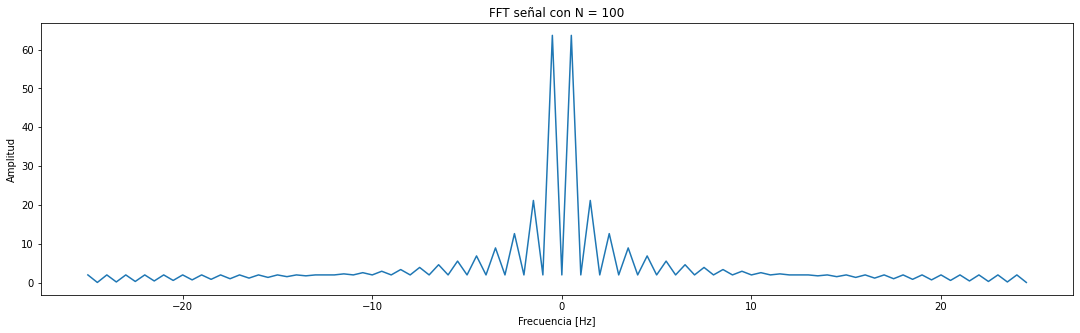

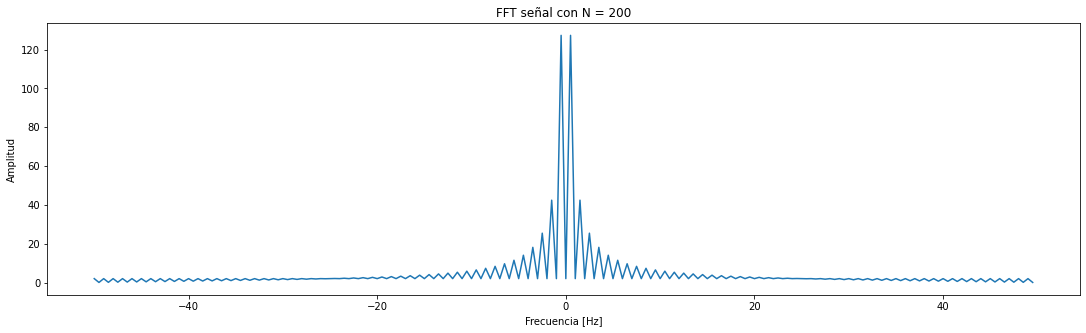

In [181]:
# Gráfica: Espectro en Frecuencias de ambas señales

fft_freq_1 = fftfreq(N1, periodo/N1)
fft_freq_2 = fftfreq(N2, periodo/N2)

fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title(f"FFT señal con N = {N1}")

plt.plot(fftshift(fft_freq_1), fftshift(np.abs(fft_senial_fixed_1)))

plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.show()

fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title(f"FFT señal con N = {N2}")

plt.plot(fftshift(fft_freq_2), fftshift(np.abs(fft_senial_fixed_2)))

plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")

plt.show()

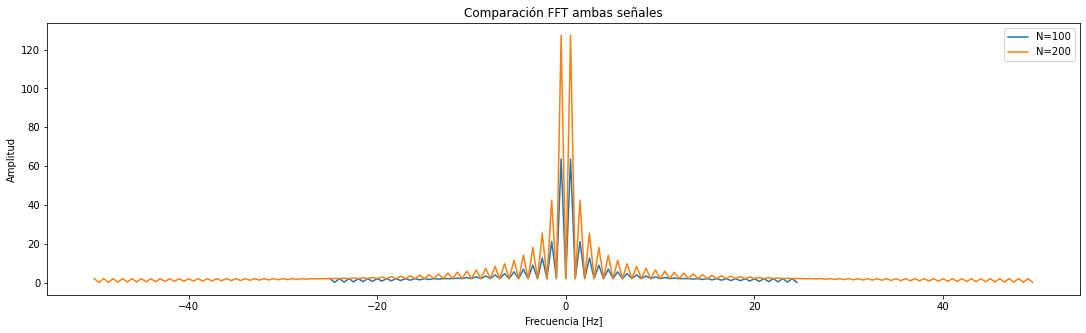

In [182]:
# Gráfica: Comparación Espectro en Frecuencias de ambas señales

fig = plt.gcf()
fig.set_size_inches(18.5, 5)

plt.title("Comparación FFT ambas señales")

plt.plot(fftshift(fft_freq_1), fftshift(np.abs(fft_senial_fixed_1)))
plt.plot(fftshift(fft_freq_2), fftshift(np.abs(fft_senial_fixed_2)))

plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.legend([f"N={N1}", f"N={N2}"])

plt.show()

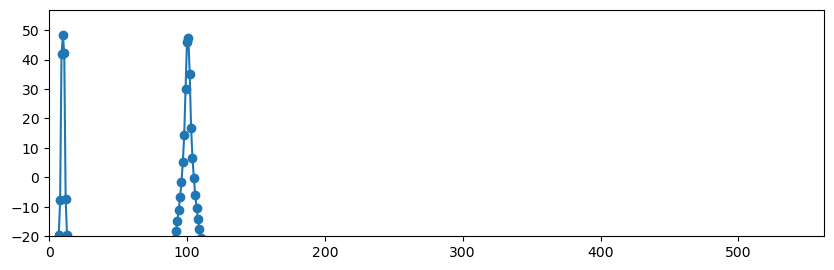

In [242]:
import scipy.signal as sig
def ejemplo_7(fc1=10.5,fc2=11.5,N=1024,ventana="boxcar"):
    """
    Periodograma con FFT
    """
    fs=N
    t=np.linspace(0,1,N)
    x=np.cos(2*np.pi*fc1*t)+np.cos(2*np.pi*fc2*t)
    X=np.fft.fftshift(np.fft.fft(x*sig.get_window(ventana,len(x))))

    X_mag_lin =np.abs(X)
    X_mag_dB = 20*np.log10(X_mag_lin)
    X_fase   = np.angle(X)*180/np.pi
    F        = np.fft.fftshift(np.fft.fftfreq(N,1/fs))
    plt.figure(figsize=(10,3),dpi=100)
    #plt.subplot(2,1,1)
    plt.plot(F,X_mag_dB,'-o')
    plt.ylim(bottom=-20)
    plt.xlim(left=0)
    #plt.subplot(2,1,2)
    #plt.plot(F,X_fase)
    plt.show()
ejemplo_7(10,100.5,ventana="hanning")

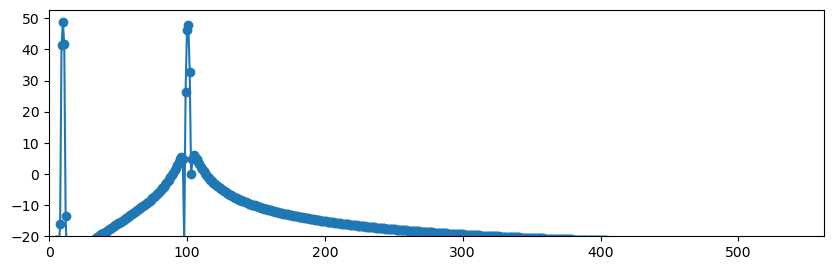

In [243]:
ejemplo_7(10,100.5,ventana="hamming")

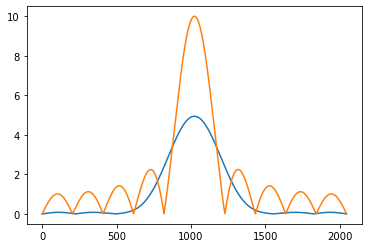

In [231]:
plt.plot(np.abs(np.fft.fftshift(np.fft.fft(sig.hamming(10),n=2048))))
plt.plot(np.abs(np.fft.fftshift(np.fft.fft(sig.boxcar(10),n=2048))))